<a href="https://colab.research.google.com/github/samer-glitch/Federated-Governance-and-Provenance-Scoring-for-Trustworthy-AI-A-Metadata-Ledger-Approach/blob/main/Comprehensive_Performance_%26_Resource_Analysis_Across_Experiments_in_Pan_A_and_Plan_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Consolidated data from all 4 corners
data = [
    # Corner 1
    ["Corner 1", "All Accepted",            "Centralized Full",     0.589663, 0.563210, 0.589663, 0.551597, 0.672802, 138307, 5,  44.591, 0.000557, 0.000265, 1],
    ["Corner 1", "All Accepted",            "TADP Centralized",     0.589663, 0.563210, 0.589663, 0.551597, 0.672802, 138307, 5,  40.200, 0.000503, 0.000239, 1],
    ["Corner 1", "All Accepted",            "Federated Full",       0.617176, 0.596702, 0.617176, 0.579069, 0.716361, 138307, 5, 208.472, 0.013029, 0.006189, 5],
    ["Corner 1", "All Accepted",            "TADP Federated",       0.618159, 0.603794, 0.618159, 0.584403, 0.715121, 138307, 5, 213.998, 0.013375, 0.006353, 5],
    ["Corner 1", "Varied Review",           "TADP Centralized",     0.572603, 0.557588, 0.572603, 0.551554, 0.664986, 131075, 3,  31.100, 0.000389, 0.000185, 1],
    ["Corner 1", "Varied Review",           "TADP Federated",       0.621762, 0.614645, 0.621762, 0.574346, 0.734747, 131075, 3, 147.417, 0.005528, 0.002626, 5],
    ["Corner 1", "Single Dataset Accepted", "TADP Centralized",     0.570183, 0.538874, 0.570183, 0.541493, 0.647803, 123075, 1,  19.789, 0.000247, 0.000117, 1],
    ["Corner 1", "Single Dataset Accepted", "TADP Federated",       0.656931, 0.641882, 0.656931, 0.620367, 0.780515, 123075, 1,  61.742, 0.000772, 0.000367, 5],

    # Corner 2
    ["Corner 2", "All Accepted",            "Centralized Full",     0.583030, 0.559998, 0.583030, 0.550168, 0.660533, 276483, 5,  81.294, 0.001016, 0.000483, 1],
    ["Corner 2", "All Accepted",            "TADP Centralized",     0.583030, 0.559998, 0.583030, 0.550168, 0.660533, 276483, 5,  84.741, 0.001059, 0.000503, 1],
    ["Corner 2", "All Accepted",            "Federated Full",       0.699912, 0.689633, 0.699912, 0.684167, 0.816555, 276483, 5, 697.320, 0.043582, 0.020702, 10],
    ["Corner 2", "All Accepted",            "TADP Federated",       0.694999, 0.685978, 0.694999, 0.677082, 0.814101, 276483, 5, 678.008, 0.042375, 0.020128, 10],
    ["Corner 2", "Varied Review",           "TADP Centralized",     0.558735, 0.557778, 0.558735, 0.540706, 0.658048, 262019, 3,  43.880, 0.000549, 0.000261, 1],
    ["Corner 2", "Varied Review",           "TADP Federated",       0.761024, 0.758314, 0.761024, 0.753407, 0.870855, 262019, 3, 438.314, 0.016437, 0.007807, 10],
    ["Corner 2", "Single Dataset Accepted", "TADP Centralized",     0.573561, 0.536924, 0.573561, 0.537440, 0.651435, 246019, 1,  43.339, 0.000542, 0.000257, 1],
    ["Corner 2", "Single Dataset Accepted", "TADP Federated",       0.898976, 0.899776, 0.898976, 0.898375, 0.976839, 246019, 1, 205.314, 0.002566, 0.001219, 10],

    # Corner 3
    ["Corner 3", "All Accepted",            "Centralized Full",     0.552864, 0.521610, 0.552864, 0.530267, 0.626594, 276483, 5, 189.990, 0.002375, 0.001128, 1],
    ["Corner 3", "All Accepted",            "TADP Centralized",     0.552864, 0.521610, 0.552864, 0.530267, 0.626594, 276483, 5, 177.090, 0.002214, 0.001051, 1],
    ["Corner 3", "All Accepted",            "Federated Full",       0.662916, 0.650677, 0.662916, 0.633601, 0.782252, 276483, 5, 955.743, 0.059734, 0.028374, 15],
    ["Corner 3", "All Accepted",            "TADP Federated",       0.666257, 0.658892, 0.666257, 0.640773, 0.783131, 276483, 5, 975.824, 0.060989, 0.028970, 15],
    ["Corner 3", "Varied Review",           "TADP Centralized",     0.520434, 0.525232, 0.520434, 0.516896, 0.625386, 262019, 3, 160.149, 0.002002, 0.000951, 1],
    ["Corner 3", "Varied Review",           "TADP Federated",       0.722210, 0.716693, 0.722210, 0.709966, 0.841003, 262019, 3, 661.434, 0.024804, 0.011782, 15],
    ["Corner 3", "Single Dataset Accepted", "TADP Centralized",     0.540105, 0.517474, 0.540105, 0.524601, 0.620072, 246019, 1,  84.796, 0.001060, 0.000503, 1],
    ["Corner 3", "Single Dataset Accepted", "TADP Federated",       0.841652, 0.840380, 0.841652, 0.838688, 0.951694, 246019, 1, 265.547, 0.003319, 0.001577, 15],

    # Corner 4
    ["Corner 4", "All Accepted",            "Centralized Full",     0.552864, 0.521610, 0.552864, 0.530267, 0.626594, 276483, 5, 168.964, 0.002112, 0.001003, 1],
    ["Corner 4", "All Accepted",            "TADP Centralized",     0.552864, 0.521610, 0.552864, 0.530267, 0.626594, 276483, 5, 167.275, 0.002091, 0.000993, 1],
    ["Corner 4", "All Accepted",            "Federated Full",       0.711899, 0.706051, 0.711899, 0.702694, 0.834350, 276483, 5,1082.502, 0.067656, 0.032137, 15],
    ["Corner 4", "All Accepted",            "TADP Federated",       0.715682, 0.708155, 0.715682, 0.704215, 0.834312, 276483, 5,1072.662, 0.067041, 0.031845, 15],
    ["Corner 4", "Varied Review",           "TADP Centralized",     0.520434, 0.525232, 0.520434, 0.516896, 0.625386, 262019, 3,  92.488, 0.001156, 0.000549, 1],
    ["Corner 4", "Varied Review",           "TADP Federated",       0.777093, 0.774244, 0.777093, 0.771901, 0.885731, 262019, 3, 741.801, 0.027818, 0.013213, 15],
    ["Corner 4", "Single Dataset Accepted", "TADP Centralized",     0.540105, 0.517474, 0.540105, 0.524601, 0.620072, 246019, 1,  64.227, 0.000803, 0.000381, 1],
    ["Corner 4", "Single Dataset Accepted", "TADP Federated",       0.931343, 0.931069, 0.931343, 0.930862, 0.990277, 246019, 1, 323.214, 0.004040, 0.001919, 15],
]

columns = [
    "Corner", "Scenario", "Approach",
    "Accuracy", "Precision", "Recall", "F1", "ROC_AUC",
    "Parameters", "Clients",
    "Time_s", "Energy_kWh", "CO2_kg", "Rounds"
]

df = pd.DataFrame(data, columns=columns)

# Color maps
color_maps = {
    'performance': {
        'Accuracy':'Blues','Precision':'Purples','Recall':'Greens',
        'F1':'Oranges','ROC_AUC':'Reds','Time_s':'YlOrBr_r'
    },
    'resources': {
        'Energy_kWh':'Greens_r','CO2_kg':'YlGn_r'
    }
}

styled_df = (
    df.style
      # performance
      .background_gradient(cmap=color_maps['performance']['Accuracy'], subset=['Accuracy'])
      .background_gradient(cmap=color_maps['performance']['Precision'], subset=['Precision'])
      .background_gradient(cmap=color_maps['performance']['Recall'], subset=['Recall'])
      .background_gradient(cmap=color_maps['performance']['F1'], subset=['F1'])
      .background_gradient(cmap=color_maps['performance']['ROC_AUC'], subset=['ROC_AUC'])
      .background_gradient(cmap=color_maps['performance']['Time_s'], subset=['Time_s'])
      # resources
      .background_gradient(cmap=color_maps['resources']['Energy_kWh'], subset=['Energy_kWh'])
      .background_gradient(cmap=color_maps['resources']['CO2_kg'], subset=['CO2_kg'])
      # formatting
      .format({
          "Accuracy":"{:.2%}","Precision":"{:.2%}","Recall":"{:.2%}",
          "F1":"{:.2%}","ROC_AUC":"{:.2%}",
          "Time_s":"{:.1f} s","Energy_kWh":"{:.4f} kWh","CO2_kg":"{:.4f} kg"
      })
      .set_caption("Comprehensive Performance & Resource Analysis Across Experimental Corners")
)

display(styled_df)


,Corner,Scenario,Approach,Accuracy,Precision,Recall,F1,ROC_AUC,Parameters,Clients,Time_s,Energy_kWh,CO2_kg,Rounds
0,Corner 1,All Accepted,Centralized Full,58.97%,56.32%,58.97%,55.16%,67.28%,138307,5,44.6 s,0.0006 kWh,0.0003 kg,1
1,Corner 1,All Accepted,TADP Centralized,58.97%,56.32%,58.97%,55.16%,67.28%,138307,5,40.2 s,0.0005 kWh,0.0002 kg,1
2,Corner 1,All Accepted,Federated Full,61.72%,59.67%,61.72%,57.91%,71.64%,138307,5,208.5 s,0.0130 kWh,0.0062 kg,5
3,Corner 1,All Accepted,TADP Federated,61.82%,60.38%,61.82%,58.44%,71.51%,138307,5,214.0 s,0.0134 kWh,0.0064 kg,5
4,Corner 1,Varied Review,TADP Centralized,57.26%,55.76%,57.26%,55.16%,66.50%,131075,3,31.1 s,0.0004 kWh,0.0002 kg,1
5,Corner 1,Varied Review,TADP Federated,62.18%,61.46%,62.18%,57.43%,73.47%,131075,3,147.4 s,0.0055 kWh,0.0026 kg,5
6,Corner 1,Single Dataset Accepted,TADP Centralized,57.02%,53.89%,57.02%,54.15%,64.78%,123075,1,19.8 s,0.0002 kWh,0.0001 kg,1
7,Corner 1,Single Dataset Accepted,TADP Federated,65.69%,64.19%,65.69%,62.04%,78.05%,123075,1,61.7 s,0.0008 kWh,0.0004 kg,5
8,Corner 2,All Accepted,Centralized Full,58.30%,56.00%,58.30%,55.02%,66.05%,276483,5,81.3 s,0.0010 kWh,0.0005 kg,1
9,Corner 2,All Accepted,TADP Centralized,58.30%,56.00%,58.30%,55.02%,66.05%,276483,5,84.7 s,0.0011 kWh,0.0005 kg,1


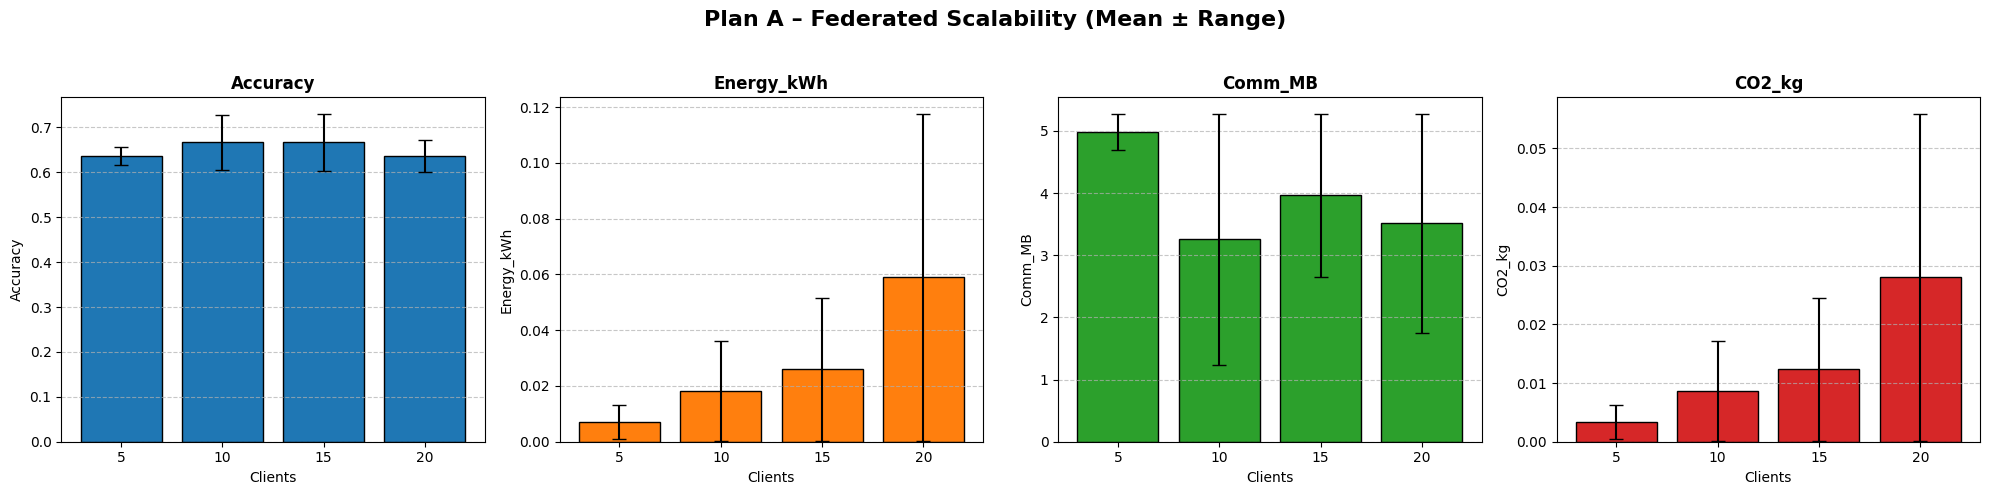

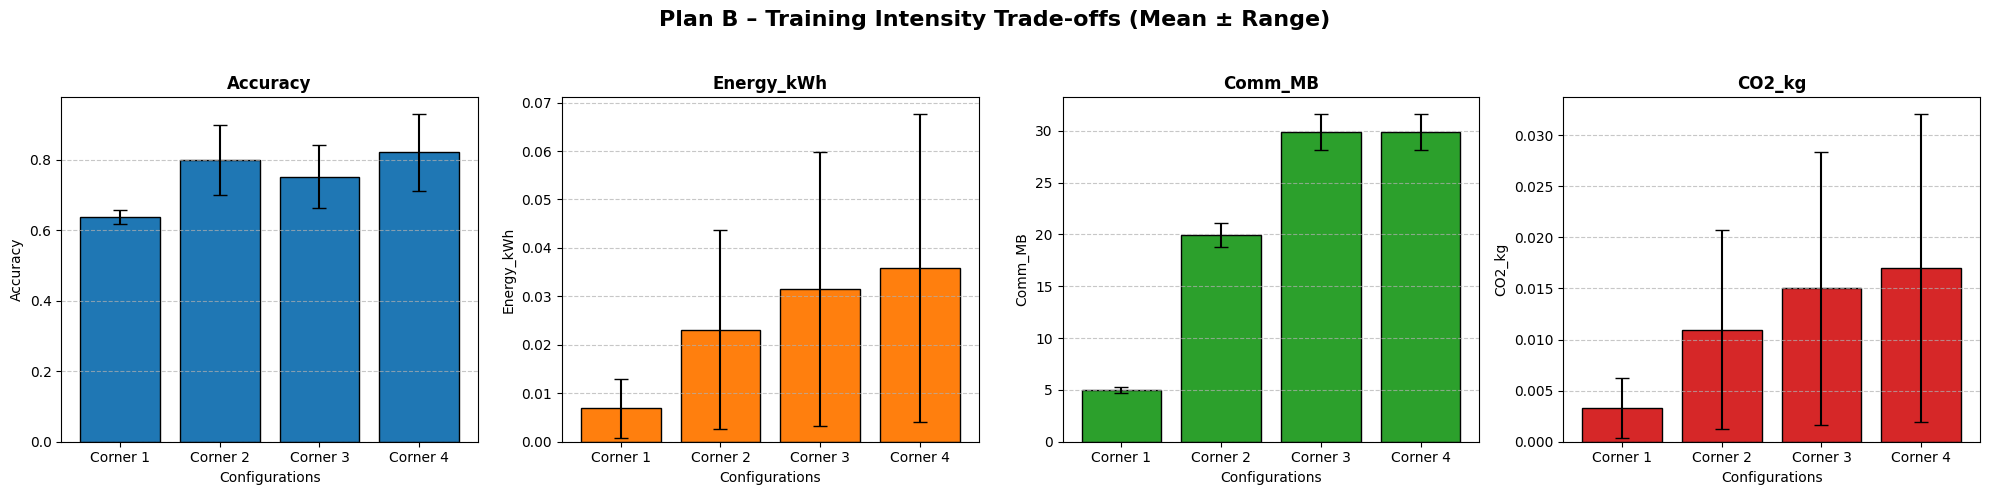

In [5]:
# Re-import required libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Define input data
clients = ['5', '10', '15', '20']
configs = ['Corner 1', 'Corner 2', 'Corner 3', 'Corner 4']

metrics_A = {
    'Accuracy': [(0.6172, 0.6569), (0.6061, 0.7273), (0.6038, 0.7305), (0.6008, 0.6715)],
    'Energy_kWh': [(0.0130, 0.0008), (0.0361, 0.0004), (0.0517, 0.0003), (0.1176, 0.0004)],
    'Comm_MB': [(5.276, 4.695), (5.276, 1.235), (5.276, 2.656), (5.276, 1.755)],
    'CO2_kg': [(0.0062, 0.0004), (0.0171, 0.0002), (0.0245, 0.0002), (0.0559, 0.0002)]
}

metrics_B = {
    'Accuracy': [(0.6172, 0.6569), (0.6999, 0.8990), (0.6629, 0.8417), (0.7119, 0.9313)],
    'Energy_kWh': [(0.0130, 0.0008), (0.0436, 0.0026), (0.0597, 0.0033), (0.0677, 0.0040)],
    'Comm_MB': [(5.276, 4.695), (21.094, 18.770), (31.641, 28.155), (31.641, 28.155)],
    'CO2_kg': [(0.0062, 0.0004), (0.0207, 0.0012), (0.0284, 0.0016), (0.0321, 0.0019)]
}

# Professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot function
def plot_error_range(x_labels, data, title):
    fig, axes = plt.subplots(1, len(data), figsize=(20, 5), sharex=True)
    for i, (ax, (metric, values)) in enumerate(zip(axes, data.items())):
        mins = [min(pair) for pair in values]
        maxs = [max(pair) for pair in values]
        means = [(min_val + max_val) / 2 for min_val, max_val in zip(mins, maxs)]

        lower_errors = [mean - min_val for mean, min_val in zip(means, mins)]
        upper_errors = [max_val - mean for mean, max_val in zip(means, maxs)]

        ax.bar(
            x_labels, means,
            yerr=[lower_errors, upper_errors],
            capsize=5,
            color=colors[i % len(colors)],
            edgecolor='black'
        )
        ax.set_title(metric, fontsize=12, fontweight='bold')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xlabel("Clients" if x_labels == clients else "Configurations")
        ax.set_ylabel(metric)

    fig.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot both plans
plot_error_range(clients, metrics_A, 'Plan A – Federated Scalability (Mean ± Range)')
plot_error_range(configs, metrics_B, 'Plan B – Training Intensity Trade-offs (Mean ± Range)')
